<a href="https://colab.research.google.com/github/NguyenQuanManh/AI_PROJECT/blob/main/train_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_compare=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_compare.flow_from_directory('/kaggle/input/traindataa/compare/Train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')
val=train_compare.flow_from_directory('/kaggle/input/traindataa/compare/test',
                                             target_size=(150,150), batch_size=32, class_mode='categorical')

Found 232 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


In [ ]:
print(training_set.class_indices,
      val.class_indices)

{'fruit': 0, 'leaf': 1} {'fruit': 0, 'leaf': 1}


In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       7

2022-12-16 06:32:08.283584: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(training_set, epochs=100, batch_size=128)

2022-12-16 06:32:13.502321: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
8/8 [==============================] - 15s 2s/step - loss: 17.8710 - accuracy: 0.5517
Epoch 2/100
8/8 [==============================] - 14s 2s/step - loss: 1.5050 - accuracy: 0.6293
Epoch 3/100
8/8 [==============================] - 14s 2s/step - loss: 0.5190 - accuracy: 0.7328
Epoch 4/100
8/8 [==============================] - 14s 2s/step - loss: 0.3496 - accuracy: 0.9181
Epoch 5/100
8/8 [==============================] - 13s 2s/step - loss: 0.1338 - accuracy: 0.9526
Epoch 6/100
8/8 [==============================] - 14s 2s/step - loss: 0.0524 - accuracy: 0.9871
Epoch 7/100
8/8 [==============================] - 14s 2s/step - loss: 0.0282 - accuracy: 0.9914
Epoch 8/100
8/8 [==============================] - 13s 2s/step - loss: 0.3209 - accuracy: 0.8750
Epoch 9/100
8/8 [==============================] - 14s 2s/step - loss: 0.6589 - accuracy: 0.7543
Epoch 10/100
8/8 [==============================] - 14s 2s/step - loss: 0.2501 - accuracy: 0.8966
Epoch 11/100
8/8 [==========

In [ ]:
model.save('compare.h5')

In [ ]:
model_h5=load_model('compare.h5')

Đây là loại: Leaf


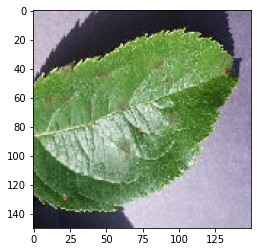

In [ ]:
img = load_img('/kaggle/input/traindataa/compare/Train/leaf/0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab 2973_90degFlipLR.JPG',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_h5.predict(img)
class_name=['Fruit','Leaf']
a= int(np.argmax(result,axis=1))
print("Đây là loại:", class_name[a])